<center><h1>Лабораторна робота 6</h1></center>

<div style="text-align: right">ФБ-21 Жиговець Олександр         </div>

<center><b>Застосування numpy</b></center>
<hr></hr><br>
<b>Мета роботи:</b> отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.<br><br>
<hr></hr>

In [141]:
import numpy as np
import matplotlib.pyplot as plt

<hr></hr>
<h3>Завдання 1.1: Згенеруйте двохвимірні дані за допомогою numpy.random </h3>

In [142]:
k = 3
b = 5

poinst_number = 120

x = np.random.uniform(0, 10, poinst_number)
noise = np.random.normal(0, 3, poinst_number)
y = k*x + b + noise

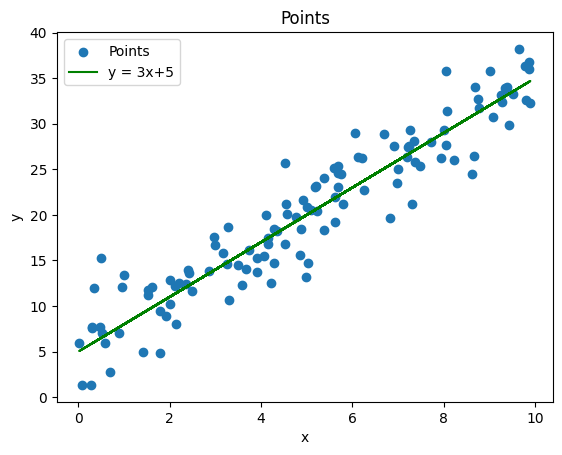

In [143]:
plt.scatter(x, y, label = "Points")
plt.plot(x, k*x+ b, color="green", label = f"y = {k}x+{b}")

plt.xlabel("x")
plt.ylabel("y")

plt.title("Points")
plt.legend()
plt.show()

<hr></hr> <br>
<h3>
Завдання 1.2: Напишіть функцію, яка реалізує метод квадратів для пошуку оптимальних оцінок k та b. <br>
Завдання 1.3: Порівняйте знайдені параметри з оцінкою np.polyfit(x, y, 1), та з початковими параметрами прямої
</h3>
<br><br>

In [144]:
def lsm(x, m):
    mx = np.mean(x)
    my = np.mean(y)

    mxx = np.mean(x*x)
    mxy = np.mean(x*y)

    kh = (mxy - mx * my) / (mxx - mx ** 2)
    bh = (my - kh * mx)

    return kh, bh

kh, bh = lsm(x, y)

knp, bnp = np.polyfit(x, y, 1)

print(f"Оцінка найменших квадратів: \nkh = {kh} \nbh = {bh}\n")
print(f"Оцінка np.polyfit: \nknp = {knp} \nbnp = {bnp}")

Оцінка найменших квадратів: 
kh = 2.9578388068933026 
bh = 5.342728131846245

Оцінка np.polyfit: 
knp = 2.957838806893305 
bnp = 5.342728131846238


<hr></hr> <br>
<h3>Завдання 1.4: Відобразіть на графіку знайдені оцінки лінії регресії</h3>
<br> <br>

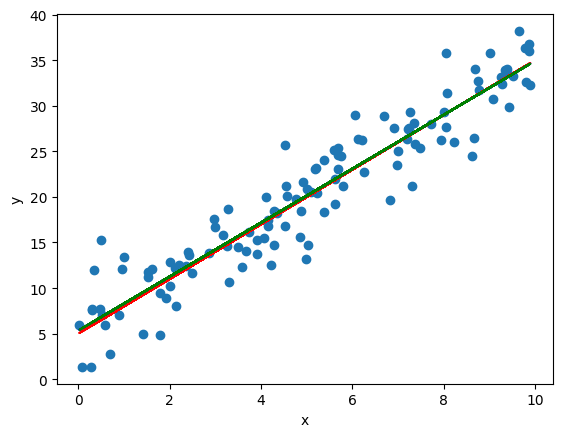

In [145]:
y_line = k*x+b
y_lsm = kh*x+bh
y_np = knp*x+bnp

plt.scatter(x,y)

plt.plot(x, y_line, color="red")
plt.plot(x, y_lsm, color="blue")
plt.plot(x, y_np, color="green")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

<hr></hr><br>

<h3>Завдання 2.1: Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b</h3>
<br><br>

In [146]:
def grad_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    loss = []

    for i in range(n_iter):
        yp = k * x + b
        
        loss_ = np.mean((yp - y) ** 2)
        loss.append(loss_)

        dk = np.sum(2 * (yp - y) * x) / x.size
        db = np.sum(2 * (yp - y)) / x.size

        k -= learning_rate * dk
        b -= learning_rate * db
    return k, b, loss

kgd, bgd, loss = grad_descent(x, y)
print(f"Оцінка параметрів (градієнтний спуск): \nkh = {kh} \nbh = {bh}")

Оцінка параметрів (градієнтний спуск): 
kh = 2.9578388068933026 
bh = 5.342728131846245


<hr></hr><br>

<h3>Завдання 2.2: Додайте отриману лінію регресії на загальний графік</h3>
<br><br>

Text(0, 0.5, 'y')

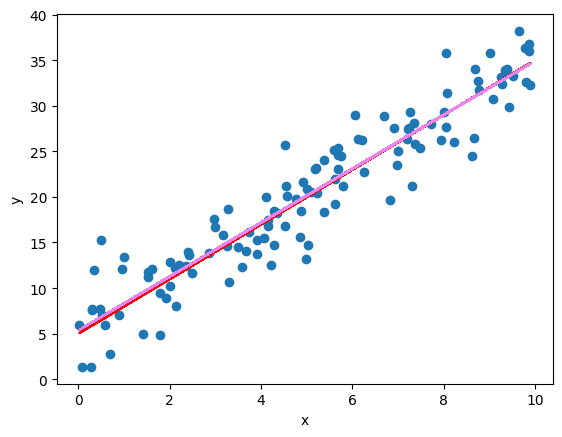

In [147]:
plt.scatter(x,y)

plt.plot(x, y_line, color="red")
plt.plot(x, y_lsm, color="blue")
plt.plot(x, y_np, color="green")
plt.plot(x, kh*x + bh, color="violet")

plt.xlabel("x")
plt.ylabel("y")

<hr></hr><br>

<h3>Завдання 2.3: Побудуйте графік похибки від кількості ітерацій</h3>
<br><br>

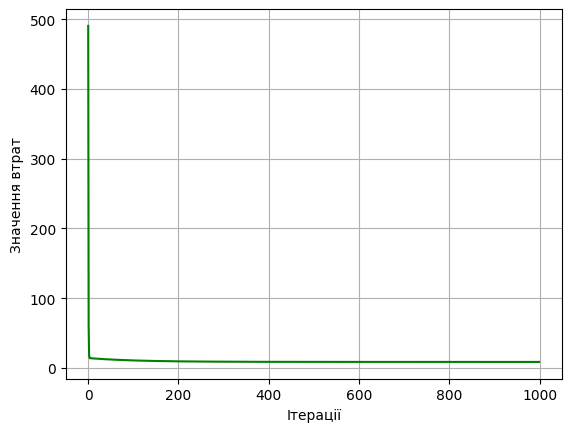

In [148]:
t = range(len(loss))
plt.plot(t, loss, color="green")
plt.xlabel("Ітерації")
plt.ylabel("Значення втрат")
plt.grid(True)
plt.show()

<hr></hr><br>

<h3>Завдання 2.4: Порівняйте отримані результати з результатами попереднього завдання</h3>
<br><br>

Метод найменших квадратів: 
k = 2.9578388068933026
b = 5.342728131846245

Градієнтний спуск: 
k = 2.9640391616788633
b = 5.301715450605758


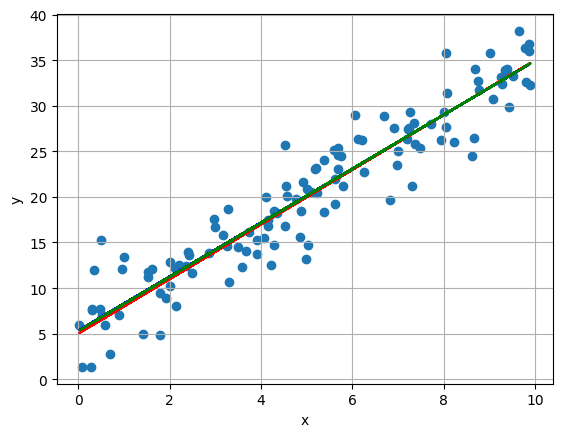

In [149]:
print(f"Метод найменших квадратів: \nk = {kh}\nb = {bh}\n")
print(f"Градієнтний спуск: \nk = {kgd}\nb = {bgd}")


plt.scatter(x, y)
plt.plot(x, y_line, color="red")
plt.plot(x, y_lsm, color="blue")
plt.plot(x, kgd*x+bgd, color="green")

plt.xlabel("x")
plt.ylabel("y")

plt.grid()
plt.show()
